# Защита персональных данных клиентов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

***Описание целей и задач проета***

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

***Описание данных***

Данные клиентов страховой компании находятся в файле:
'/datasets/insurance.csv'

Признаки:
 - пол
 - возраст
 - зарплата
 - члены семьи
 - страховые выплаты

***ПЛАШ ВЫПОЛНЕНИЯ ПРОЕКТА***


1) Загрузите и изучить данные.
2) Ответить на вопрос и обосновать решение:
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
-  a. Изменится. Приведите примеры матриц.
- b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
 
3) Предложить алгоритм преобразования данных для решения задачи. Обоснование, почему качество линейной регрессии не поменяется.
Запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить для оценки качества метрику R2.

## Загрузка данных

In [3]:
#загрузка библиотек, методов и пр.
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler

In [30]:
#загрузка данных
data = pd.read_csv('/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
#посмотрим описание
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [6]:
#проверим наличие пропусков
data.isnull().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [7]:
#оценим наличие полных дубликатов
print(data.duplicated().sum())

153


In [8]:
#посмотрим уникальные значения по тем, колонкам, где планируем менять тип на bool 
print ('Пол:', data['Пол'].unique())
print ('Возраст:', data['Возраст'].unique())
print ('Члены семьи:', data['Члены семьи'].unique())
print ('Страховые выплаты:', data['Страховые выплаты'].unique())

Пол: [1 0]
Возраст: [41. 46. 29. 21. 28. 43. 39. 25. 36. 32. 38. 23. 40. 34. 26. 42. 27. 33.
 47. 30. 19. 31. 22. 20. 24. 18. 37. 48. 45. 44. 52. 49. 35. 56. 65. 55.
 57. 54. 50. 53. 51. 58. 59. 60. 61. 62.]
Члены семьи: [1 0 2 4 3 5 6]
Страховые выплаты: [0 1 2 3 5 4]


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Корреляция признаков


<AxesSubplot:>

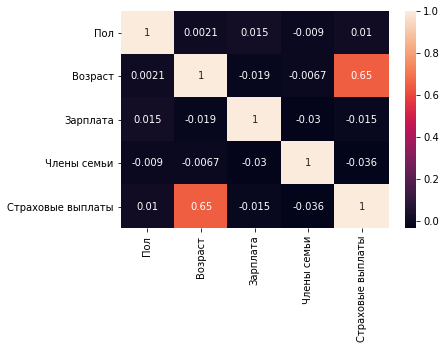

In [10]:
#тепловая карта корреляции
print ('Корреляция признаков')
upp_mat = np.triu(data.corr())
sns.heatmap(data.corr(), annot = True)

***Вывод по данным:***

 - пропусков в данных нет, 
 - дубликаты есть, но их удалять не будем, так как без ФИО нельзя подвердить полные ли это дубликаты.
 - корреляция есть между возрастом и страховыми выплатами, но не критичная.
    
    
Предобработка данных не требуется.

***Разделим данные на выборки, проведем кодирование и стандартизацию***

In [11]:
#разделим данные на выборки
df_train, df_test, = train_test_split(data, test_size=0.25, random_state=12345)

#проверим размер получившихся выборок
print(' ')
print('Размер тренировочной выборки', df_train.shape)
print('Размер тестовой выборки',  df_test.shape)
print(' ')
print('Размер тренировочной выборки- {:.0%}'.format(df_train.shape[0]/data.shape[0]))
print('Размер тестовой выборки - {:.0%}'.format(df_test.shape[0]/data.shape[0]))

 
Размер тренировочной выборки (3750, 5)
Размер тестовой выборки (1250, 5)
 
Размер тренировочной выборки- 75%
Размер тестовой выборки - 25%


In [12]:
#проведем кодирование выборок
df_train = pd.get_dummies(df_train, drop_first=True)

df_test = pd.get_dummies(df_test, drop_first=True)

#проверим размер выборок после кодировки, чтобы не было утечек
print('Размер тренировочной выборки', df_train.shape)

print('Размер тестовой выборки', df_test.shape)

print(df_train.columns)
print(df_train.head())

Размер тренировочной выборки (3750, 5)
Размер тестовой выборки (1250, 5)
Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')
      Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
3369    1     43.0   36200.0            1                  1
1441    1     34.0   57600.0            0                  0
571     0     32.0   41100.0            1                  0
225     0     36.0   45100.0            1                  0
2558    0     33.0   50600.0            2                  0


In [13]:
#создадим переменные для признаков и целевого признака 
#для тренировочных данных
train_features = df_train.drop(['Страховые выплаты'], axis=1)
train_target = df_train['Страховые выплаты']

#для тестоавых данных
test_features = df_test.drop(['Страховые выплаты'], axis=1)
test_target = df_test['Страховые выплаты']

In [14]:
#проведем стандартизацию данных

#список всех численных признаков.
numeric = ['Возраст', 'Зарплата', 'Члены семьи']

#создадим объект стандартизации и обучим его
scaler = StandardScaler()
scaler.fit(train_features[numeric])

#сохраним преобразованные обучающую,валидационную и тестовую  выборки в переменные
train_features[numeric] = scaler.transform(train_features[numeric])
test_features[numeric] = scaler.transform(test_features[numeric])
pd.options.mode.chained_assignment = None


display (train_features.head())

,Пол,Возраст,Зарплата,Члены семьи
3369,1,1.414133,-0.378266,-0.164081
1441,1,0.349559,1.789514,-1.078353
571,0,0.112987,0.118095,-0.164081
225,0,0.586131,0.523287,-0.164081
2558,0,0.231273,1.080427,0.750191


***Вывод:*** кодирование и масштабирование данных прошло успешно.

***Создалим класс и проведем обучение модели на неизменненных признаках. Рассчитаем метрику R2-Score***

In [13]:
#для этого создадим класс

class LinearRegress:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [14]:
model = LinearRegress()
model.fit(train_features, train_target)
predict = model.predict(test_features)

R2_score = r2_score(test_target, predict)


print("R2_score - модели на неизмененных данных:", R2_score.round(4))

R2_score - модели на неизмененных данных: 0.4352


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** В задаче нам предстоит умножить признаким на обратимую матрицу () и проверить измненится ли при этом качество (в данном случае) метрика модели R2_score.

**Обоснование:** 

Умножение матрицы на матрицу возможно, если ширина первой матрицы А(m×n) равна высоте второй матрицы P(n×r). Тогда размер произведения этих матриц будет m×r. Размерность n «cхлопывается».

При умножении признаков выборки A размерностью (3750,4) на обратимую произвольную матрицу P размерностью (4,4)получим изменённые/ зашифрованные данных скалярных произведений M размернотью (3750,4).

Формула выглядит следующим образом:
$$
Mij=(Ai,Bj)
$$

В каждую новую ячейку записывается результат сложения произведений строки i на столбец j. Для примера, в первой ячейке новой таблицы будет записан результат по этой формуле:
$$
M11=A11×P11+A12×P21+A13×P31+A14×P41
$$
Далее вычисляется важный параметр - вектор w
 по формуле:
$$
w = (X^T X)^{-1} X^T y
$$
В которой X - таблица признков, где нулевой столбец заполнен 1 (единицами), а y - вектор целевого признака Xi=(1Mi2Mi3Mi4Mi5)

В Линейной регрессии предсказания вычисляются по формуле:
$$
a=Xw+w0,
$$
где w0- значение нулевого аргумента вектора w, которое предствляет собой величину сдвига модели, при подборе которого можно достигать более низкого значения среднеквадратичного отклонения MSE.

Рассмотрим упрощённую запись формулы предсказания Линейной регрессии a=Xiw, где Xi - новые строки признаков
Подставим вместо параметра w, формулу её вычисления:
$$
a=Xiw=Xi(XTX)−1XTy
$$
Упроситим формулу используя принцип ассоциативности (A(BC)=(AB)C) и то, что транспонированное произведение матриц равно произведению транспонированных матриц взятых в обратном порядке ((AB)T=BTAT):
$$
a=Xi(XTX)−1XTy=XiX−1(XT)−1XTy=XiX−1y
$$
Домножим наши признаки на случайную матрицу P, в которой число строк равно чилу столбцов X и P - обратима, то есть из матрицы P
можно получить матрицу P−1, при этом PP−1=E, где E - единичная матрица

Если обучить нашу модель на новых (изменённых) признаках, то модель найдёт новые коэффициенты w′
$$
w′=((XP)T(XP))−1(XP)Ty
$$
Подставим их в формулу предсказания и упростим выражение
$$
a′=XiPw′=XiP((XP)T(XP))−1(XP)Ty=XiP(XP)−1((XP)T)−1(XP)Ty=XiX−1y
$$
Таким образом мы пришли к заключению, о том что результат предсказания не изменится не смотря на измениения признаков, т.к. исходя из результатов наших преобразований очевидно, что a
 = a′.
 
***ВЫВОД:*** Поэтому, если изменить исходные данные методом умножения признаков на обратимую матрицу, качество предсказания модели не изменится, так как в результает  преобразованя данных случайная матрица P сокращается.

Умножение матрицы на матрицу возможно, если ширина первой матрицы А(m×n) равна высоте второй матрицы P(n×r). Тогда размер произведения этих матриц будет m×r. Размерность n «cхлопывается».

При умножении признаков выборки A размерностью (3750,4) на обратимую произвольную матрицу P размерностью (4,4)получим изменённые/ зашифрованные данных скалярных произведений M размернотью (3750,4).

Формула выглядит следующим образом:
$$
Mij=(Ai,Bj)
$$

В каждую новую ячейку записывается результат сложения произведений строки i на столбец j. Для примера, в первой ячейке новой таблицы будет записан результат по этой формуле:
$$
M11=A11×P11+A12×P21+A13×P31+A14×P41
$$
Далее вычисляется важный параметр - вектор w
 по формуле:
$$
w = (X^T X)^{-1} X^T y
$$
В которой X - таблица признков, где нулевой столбец заполнен 1 (единицами), а y - вектор целевого признака Xi=(1Mi2Mi3Mi4Mi5)

В Линейной регрессии предсказания вычисляются по формуле:
$$
a=Xw+w0,
$$
где w0- значение нулевого аргумента вектора w, которое предствляет собой величину сдвига модели, при подборе которого можно достигать более низкого значения среднеквадратичного отклонения MSE.

Рассмотрим упрощённую запись формулы предсказания Линейной регрессии a=Xiw, где Xi - новые строки признаков
Подставим вместо параметра w, формулу её вычисления:
$$
a=Xiw=Xi(XTX)−1XTy
$$
Упроситим формулу используя принцип ассоциативности (A(BC)=(AB)C) и то, что транспонированное произведение матриц равно произведению транспонированных матриц взятых в обратном порядке ((AB)T=BTAT):
$$
a=Xi(XTX)−1XTy=XiX−1(XT)−1XTy=XiX−1y
$$
Домножим наши признаки на случайную матрицу P, в которой число строк равно чилу столбцов X и P - обратима, то есть из матрицы P
можно получить матрицу P−1, при этом PP−1=E, где E - единичная матрица

Если обучить нашу модель на новых (изменённых) признаках, то модель найдёт новые коэффициенты w′
$$
w = (X^T X)^{-1} X^T y
$$
$$
w_p =  (XP^T XP)^{-1} XP^T y
$$ 

Расскрываем скобки
$$
w_p = (P^T(X^T X)P)^{-1} * P^TX^Ty = P^{-1} (X^T X)^{-1} (P^T)^{-1} *P^TX^Ty
$$


где 

$$P^T* (P^T)^{-1} = E = 1
$$

так как P- обратимая матрица, мы это проверяем

Тогда получаем
$$
w_p  = P^{-1} (X^T X)^{-1} * X^Ty 
$$

Где 

$$(X^T X)^{-1} * X^Ty = w
$$

Тогда

$$
w_p = w*P^{-1}
$$

***Это даем нам соотношение w  и w_p***

Переходим к предказанию 

$$
a = Xw
$$

$$
a_p = X_p * w_p = XP*w*P^{-1} 
$$

Где 
$$
P*P^{-1} = E = 1
$$

Соответсвенно,

$$
a_p = X_p * w_p = XP*w*P^{-1} = X*w*E = X*w
$$

***Таким обращом, мы доказали, что предсказания a_p для матрицы признаков, умноженных на обратимую матрицу P равны предсказаниям a. Следовательно, качество линейной регрессии при умножении признаков на обратимую матрицу не изменится.***

***При этом параметры линейной регрессии в исходной задаче и в преобразованной связаны по формуле:***

$$
w_p = P^{-1}*w
$$
Таким образом мы пришли к заключению, о том что результат предсказания не изменится не смотря на измениения признаков, т.к. исходя из результатов наших преобразований очевидно, что a
 = a′.
 
***ВЫВОД:*** Поэтому, если изменить исходные данные методом умножения признаков на обратимую матрицу, качество предсказания модели не изменится, так как в результает  преобразованя данных случайная матрица P сокращается.

## Алгоритм преобразования

**Алгоритм**

1. Создаём рандомную матрицу P

2. Проверяем её на обратимость
3. Создаём новую матрицу данных M, которая равна произведению признаков на рандомную матрицу.
4. Расчсчитываем ее метрики качества -  R2_score на исходных данных и изменненных.
5. Делаем вывод.

**Обоснование**

Если изменить исходные данные методом умножения признаков на обратимую матрицу, качество предсказания модели не изменится, так как в результает  преобразованя данных случайная матрица P сокращается, что было доказано в формулах выше.

## Проверка алгоритма

In [28]:
#Создадим произвольную матрицу по длине совпадающую с шириной нашей выборки
matrix=np.random.normal(3, size=(train_features.shape[1],train_features.shape[1]))
matrix

array([[3.09780177, 4.41649969, 4.1098727 , 3.22424583],
       [1.73059839, 4.20431657, 3.14121637, 2.56489286],
       [3.25828411, 1.16754864, 2.55532463, 2.43945184],
       [3.65136227, 2.24159057, 1.55487839, 2.84194396]])

In [29]:
#Проверим обратимость нашей матрицы

np.linalg.inv(matrix)

array([[ 2.01976633, -2.06247894, -0.94507331,  0.38117399],
       [ 1.07943465, -0.79536545, -0.94202614,  0.30179761],
       [ 0.46378706, -0.28337751,  0.33139625, -0.55488629],
       [-3.70017205,  3.43228409,  1.77595376, -0.07232033]])

Проверка не показала ошибку, значит мы создали обратимую матрицу. Если бы созданная матрица была необратимой, то в результате шифрования при умноженни признаков на такую матрицу, были бы только нули.

In [27]:
#умножение признаки на созданную произвольную матрицу
#тренировочные признаким
train_matrix=train_features@matrix
train_matrix.columns = train_features.columns
train_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
3369,6.122519,4.715498,5.249467,7.285629
1441,8.397003,7.870066,1.879121,7.719310
571,0.230513,0.232625,-0.223889,0.421385
225,2.747220,2.595908,1.894428,3.506492
2558,6.234335,6.087744,6.179728,5.972401


In [18]:
#изменение тестовых признаков
test_matrix=test_features@matrix
test_matrix.columns = test_features.columns
test_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
3183,11.164761,7.738865,8.289026,6.610322
1071,10.987680,9.180574,11.433841,9.479736
2640,2.613055,2.637715,4.524750,1.866861
2282,-10.535993,-8.151348,-9.711305,-7.696749
1595,14.317994,10.608236,12.046446,9.798220


In [19]:
#поверим изменилась ли метрика после измнения данных 

model2 = LinearRegression()
model2.fit(train_matrix,train_target)
predictions2= model2.predict(test_matrix)
print("R2_score Линейной регрессии неизменённой матрицы:", R2_score.round(4))
print("R2_score Линейной регрессии изменённой матрицы:", r2_score(test_target,predictions2).round(4))

R2_score Линейной регрессии неизменённой матрицы: 0.4352
R2_score Линейной регрессии изменённой матрицы: 0.4352


***Вывод***:после умножения признаков на обратимую случанйю матрицу метрика качества предсказания модели осталась прежней.

***ВЫВОД ПО ПРОЕКТУ:***

В проекте была поставлена задача защитить данные клиентов страховой компании «Хоть потоп» и разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, при этом после их преобразовании качество моделей машинного обучения не должно было ухудшиться.

Для выполнения целей проекта  был разработан алгоритм, где данные преобразовывались следующим образом: матрица исходных признаков умножалась на обратимую рандомную матрицу P. После чего появилась изменённая/ зашифрованная матрица признаков с данными, которые сложно персонифицировать. 

Мы сравнили метрики качества R2_score аналогичных моделей, которые делали предсказания по оригинальным и зашифрованным данным 
и они были равны между собой с составили  0.4352.

Таким образом задача, поставленная в проекте, была выполнена.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [х]  Весь код выполняется без ошибок
- [х]  Ячейки с кодом расположены в порядке исполнения
- [х]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования